In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from markowitz.data import ingest, preprocess
from markowitz.simulate import scenarios, efficient_frontier, portfolio_return

### Download the ticker data

In [2]:
sd = "2016-01-01"
ed = "2020-12-31"
#tickers = ["RGAGX", "TISCX", "VBTIX", "VTIFX"]
exp_ratio = {
    'VBMPX':0.03,
    'VTIFX':0.07,
    'VMFXX':0.11,
    'VIIIX':0.02,
    'VSMPX':0.02,
    'VEXRX':0.34,
    'VTPSX':0.07,
    'VGSNX':0.1
}
tickers = exp_ratio.keys()

data = ingest(tickers, sd, ed)
df = preprocess(data, tickers)

[*********************100%***********************]  8 of 8 completed


### Simulate and visualize

In [3]:
# 1-year returns for each vehicle across multiple scenarios
# each row is a scenario
rdf = scenarios(df, tickers, exp_ratio, nscenarios=200, ndays=365)
print(rdf.shape)
rdf.head()

(200, 8)


,VBMPX,VTIFX,VMFXX,VIIIX,VSMPX,VEXRX,VTPSX,VGSNX
0,-0.004396,0.010315,-0.0011,0.387936,0.458876,0.448824,0.387286,0.266098
1,-0.025352,-0.005933,-0.0011,0.149387,0.160961,0.028512,0.080313,-0.261742
2,-0.004061,0.064950,-0.0011,0.409816,0.440886,0.371751,0.159474,0.024292
3,0.002796,-0.003435,-0.0011,0.171392,0.225061,0.241606,0.037575,-0.131888
4,0.039813,0.021636,-0.0011,0.050720,0.058333,-0.070352,-0.129963,0.019372


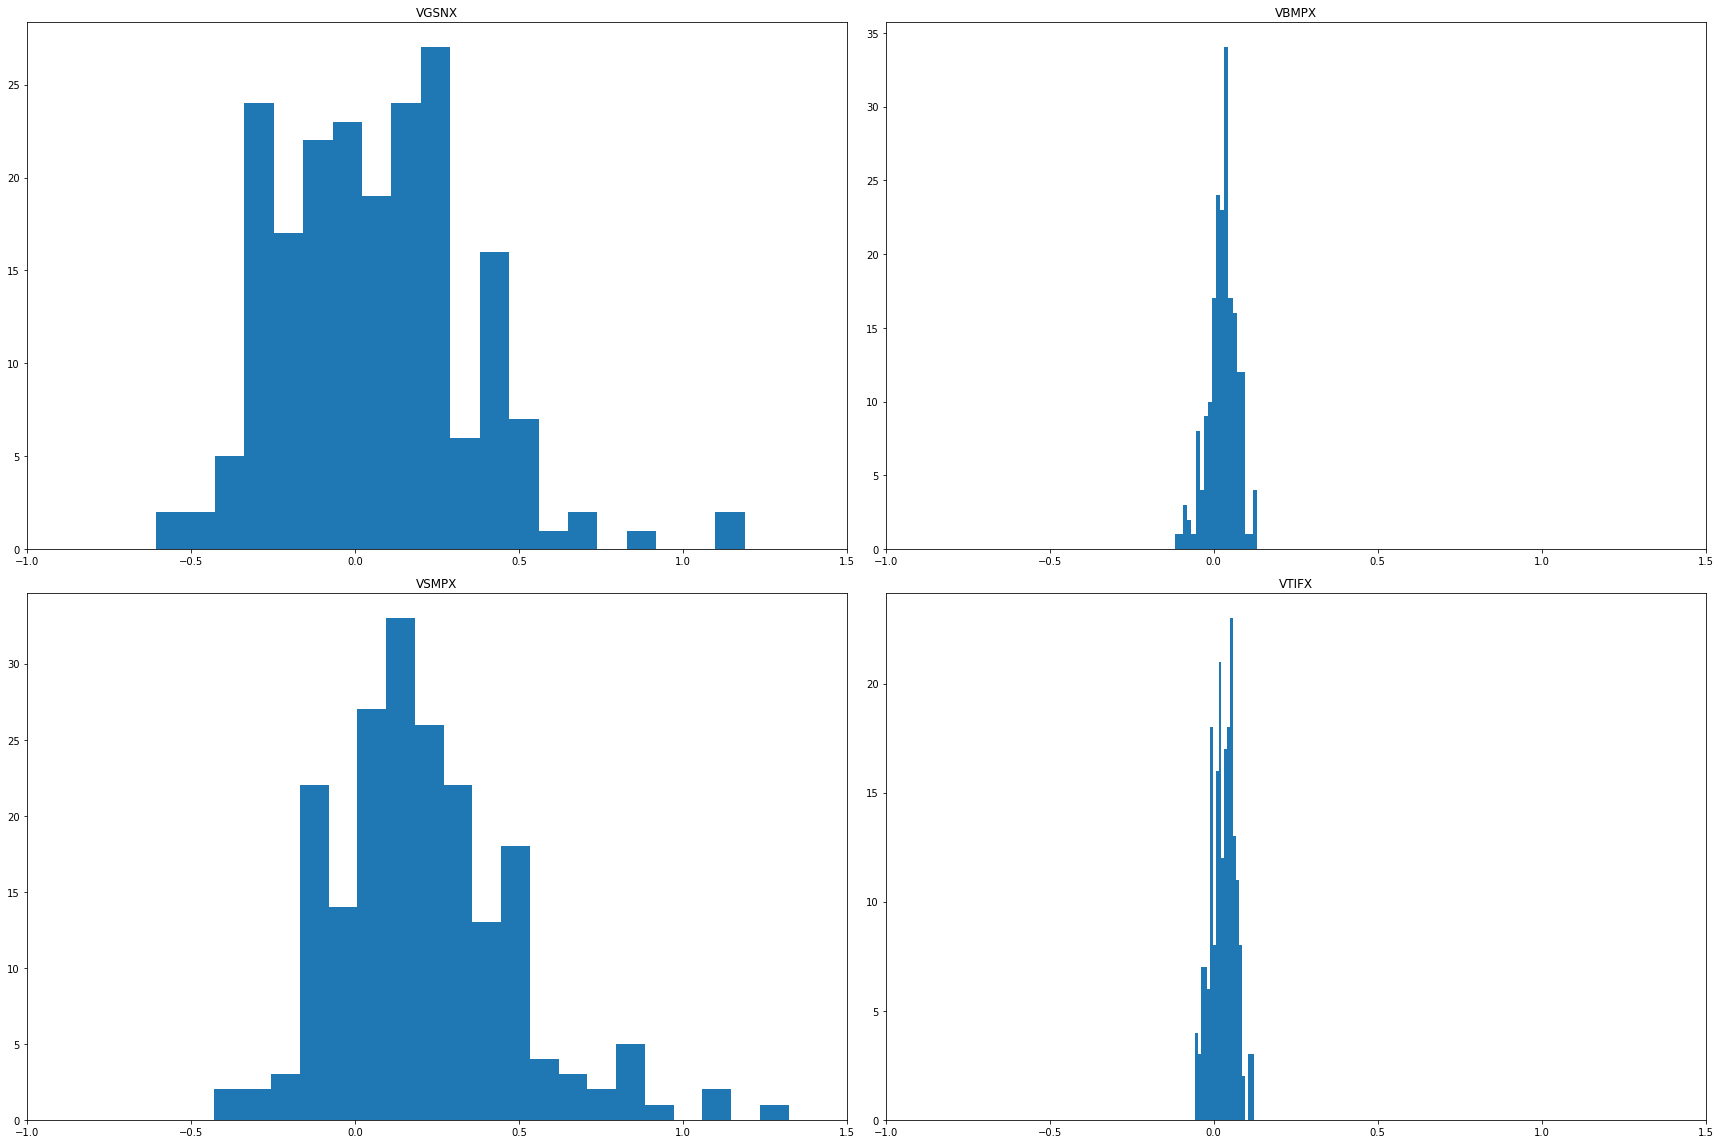

In [4]:
assets = ["VGSNX","VBMPX","VSMPX","VTIFX"]

fig = plt.figure(figsize=(24, 16))
ctr = 0
for i in range(len(assets)):
    plt.subplot(2,2,i+1)
    plt.hist(rdf[assets[i]], bins=20)
    plt.xlim([-1,1.5])
    plt.title(assets[i])

plt.tight_layout()
plt.show()

### Optimize

In [5]:
from markowitz.optimize import optimize

In [6]:
max_risk, min_ratio, min_assets = 0.01, 0.2, 2
obj, wopt, orisk = optimize(rdf, exp_ratio, max_risk, min_ratio, min_assets)
print(obj)
print(wopt)
print(orisk)

12.367347868697964
{0: 0.39866609, 1: 0.081758933, 2: 0.0, 3: 0.0, 4: 0.51957498, 5: 0.0, 6: 0.0, 7: 0.0}
0.009999999984499998


/Users/anshulagarwal/opt/anaconda3/envs/aag/lib/python3.7/site-packages/pulp/pulp.py:1114: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


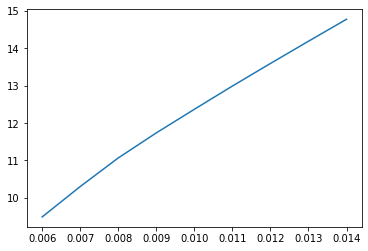

In [7]:
mrisk, optrets = optimize(rdf, exp_ratio, max_risk, min_ratio, min_assets, frontier=True)
plt.plot(mrisk, optrets)